In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
#importing database
ds=pd.read_csv("Mall_Customers.csv")
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
#taking input values for x

x = ds[["Annual Income (k$)","Spending Score (1-100)"]]

In [16]:
#importing model selection library(kmeans)and fitting for prediction of clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init ='k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(x)

In [17]:
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [20]:
# Making cluster table 

result=pd.DataFrame(data=y_kmeans,columns=['Cluster'])
result

                    

,Cluster
0,4
1,2
2,4
3,2
4,4
...,...
195,1
196,3
197,1
198,3


In [22]:
#join x data and cluster type data

data  = pd.concat([x,result],axis=1)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

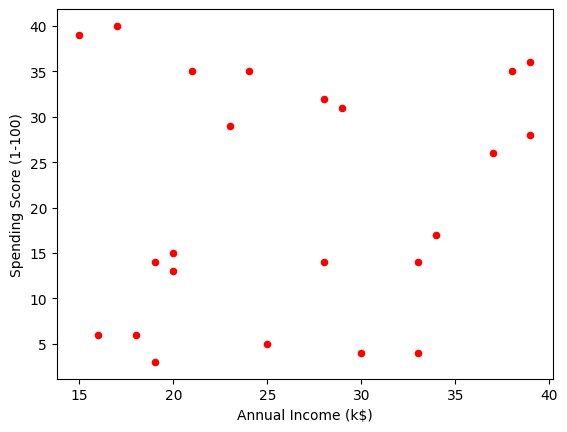

In [28]:
# Getting specific cluster list visualization

data[data['Cluster']==4].plot(kind = 'scatter',x = "Annual Income (k$)",y = "Spending Score (1-100)",color = 'red')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

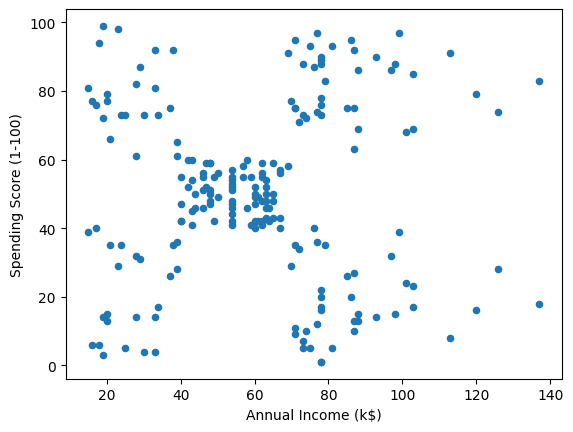

In [32]:
# Plotting variable of x 

x.plot(kind = 'scatter', x = "Annual Income (k$)",y = "Spending Score (1-100)")

In [27]:
# I want to predict for my input 
kmeans.predict([[30,70]])

C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2], dtype=int32)

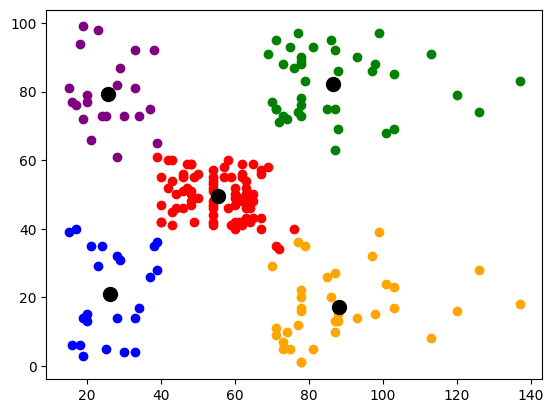

In [34]:
# Clusterwise Visualization

colors = ['red','green','purple','orange','blue']
for i in range(0,5):
    cluster = data[data['Cluster'] == i]
    plt.scatter(cluster["Annual Income (k$)"],cluster ["Spending Score (1-100)"],color = colors[i])
    plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i, 1],color = 'black', s = 100)


In [38]:
# User input 
print("Enter new customer data to predict cluster:")

income = float(input("Enter Annual Income (k$):"))
score = float(input("Enter Spending Score (1-100):"))

# Predict the cluster for new customer 
predicted_cluster = kmeans.predict([[income, score]])[0]
print(f"The customer belong to Cluster {predicted_cluster}")

Enter new customer data to predict cluster:


Enter Annual Income (k$): 500
Enter Spending Score (1-100): 70


The customer belong to Cluster 1


C:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
